In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

In [2]:
ip = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(list(ip.columns))
ip.head()

['Data', 'Hora', 'Data_Hora', 'UmidadeRelativa_0', 'PressaoAtmosferica_0', 'TemperaturaDoAr_0', 'TemperaturaInterna_0', 'PontoDeOrvalho_0', 'SensacaoTermica_0', 'RadiacaoSolar_0', 'DirecaoDoVento_0', 'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0', 'UmidadeRelativa_1', 'PressaoAtmosferica_1', 'TemperaturaDoAr_1', 'TemperaturaInterna_1', 'PontoDeOrvalho_1', 'SensacaoTermica_1', 'RadiacaoSolar_1', 'DirecaoDoVento_1', 'VelocidadeDoVento_1', 'Precipitacao_1', 'Local_1', 'UmidadeRelativa_2', 'PressaoAtmosferica_2', 'TemperaturaDoAr_2', 'TemperaturaInterna_2', 'PontoDeOrvalho_2', 'SensacaoTermica_2', 'RadiacaoSolar_2', 'DirecaoDoVento_2', 'VelocidadeDoVento_2', 'Precipitacao_2', 'Local_2', 'UmidadeRelativa_3', 'PressaoAtmosferica_3', 'TemperaturaDoAr_3', 'TemperaturaInterna_3', 'PontoDeOrvalho_3', 'SensacaoTermica_3', 'RadiacaoSolar_3', 'DirecaoDoVento_3', 'VelocidadeDoVento_3', 'Precipitacao_3', 'Local_3', 'UmidadeRelativa_4', 'PressaoAtmosferica_4', 'TemperaturaDoAr_4', 'TemperaturaInte

,Data,Hora,Data_Hora,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,...,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,31/12/11,23:46:34,31/12/11 23:46:34,94.2,916.9,18.9,22.5,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/12/11,23:30:32,31/12/11 23:30:32,94.3,917.0,18.8,22.4,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31/12/11,23:16:32,31/12/11 23:16:32,94.2,917.0,18.8,22.4,17.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31/12/11,23:00:32,31/12/11 23:00:32,94.2,917.1,18.7,22.4,17.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31/12/11,22:46:32,31/12/11 22:46:32,94.2,917.1,18.8,22.5,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Umidade Relativa 

In [3]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

,UmidadeRelativa_0,UmidadeRelativa_1,UmidadeRelativa_2,UmidadeRelativa_3,UmidadeRelativa_4
0,94.2,94.1,NaN,91.6,NaN
1,94.3,94.1,NaN,91.4,NaN
2,94.2,94.1,NaN,91.6,NaN
3,94.2,94.1,NaN,93.1,NaN
4,94.2,94.1,NaN,93.4,NaN


#### Derivada

In [4]:
d_um0 = np.gradient(um[cols_um[0]])

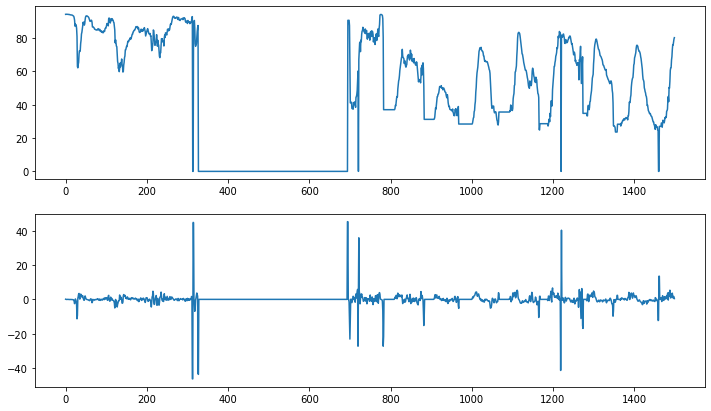

In [5]:
start = 0
stop  = 1500
plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)
ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
ax2 = plt.subplot(212)
ax2.plot(um[cols_um[0]].index[start:stop],d_um0[start:stop])
plt.show()

#### Derivada muito alta

In [6]:
threshold = 15
high_d = []
for i in range(len(d_um0)):
    if abs(d_um0[i]) > threshold:
        high_d.append(True)
    else:
        high_d.append(False)

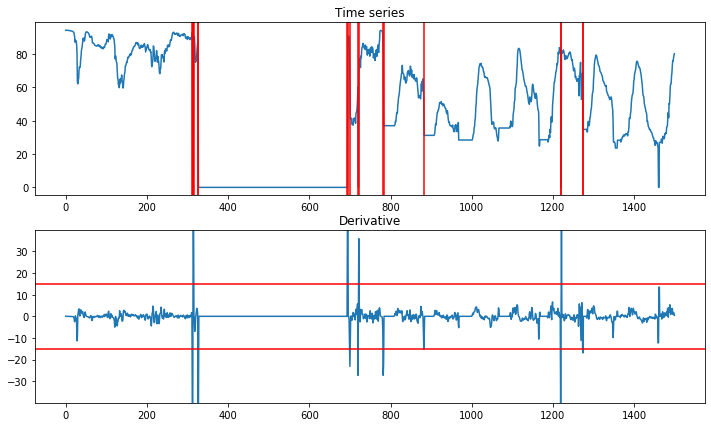

In [7]:
start = 0
stop  = 1500
plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)
ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
ax2 = plt.subplot(212)
ax2.plot(um[cols_um[0]].index[start:stop],d_um0[start:stop])
ax2.axhline(threshold , c = 'r')
ax2.axhline(-threshold, c = 'r')
i = 0
for d in high_d: # plot vertical lines  -- cannot plot multiple lines at once
    if d and i > start and i < stop:
        ax1.axvline(i, ymin=-30, ymax=30, c = 'r', alpha = 1)
    i = i + 1
ax2.set_yticks(np.arange(-30,31,10))
ax2.set_ylim(-40,40)
ax1.set_title('Time series')
ax2.set_title('Derivative')
plt.show()

### Derivada zero

In [8]:
n_zeros = 5
is_const = []
for i in range(len(d_um0)):
    aux = True
    for n in range(n_zeros):
        aux = aux and (d_um0[i + n] == 0 or d_um0[i - n] == 0)
    is_const.append(aux)

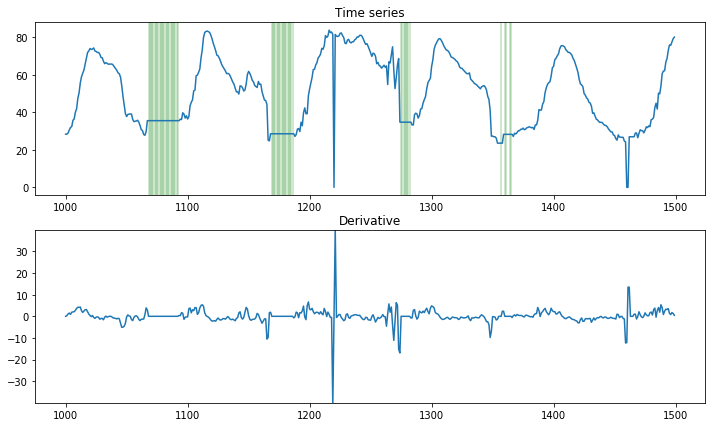

In [9]:
start = 1000
stop  = 1500
plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)

i = 0
for d in is_const: # plot vertical lines  -- cannot plot multiple lines at once
    if d and i > start and i < stop:
        ax1.axvline(i, ymin=-30, ymax=30, c = 'g', alpha = 0.25)
    i = i + 1

ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
ax2 = plt.subplot(212)
ax2.plot(um[cols_um[0]].index[start:stop],d_um0[start:stop])

ax2.set_yticks(np.arange(-30,31,10))
ax2.set_ylim(-40,40)
ax1.set_title('Time series')
ax2.set_title('Derivative')
plt.show()

### Dados com erro

In [10]:
is_error = [is_const[i] or high_d[i] for i in range(len(high_d))]

### Create regions

In [11]:
regions = []
i = 0
status = False
for bool_ in is_error:
    if bool_ and not status:
        start = i
        status = True
    if not bool_ and status:
        end = i
        status = False
        regions.append([start,end])
    i += 1

In [12]:
is_error

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [13]:
regions

[[5, 6],
 [312, 316],
 [326, 696],
 [700, 701],
 [720, 721],
 [722, 723],
 [782, 810],
 [882, 883],
 [884, 907],
 [969, 1001],
 [1068, 1093],
 [1169, 1187],
 [1219, 1220],
 [1221, 1222],
 [1273, 1283],
 [1357, 1358],
 [1360, 1362],
 [1364, 1366],
 [1529, 1530],
 [1531, 1532],
 [1742, 1763],
 [2240, 2241],
 [2526, 2527],
 [2528, 2529],
 [2537, 2538],
 [2539, 2540],
 [2812, 2813],
 [2814, 2815],
 [2907, 2908],
 [2997, 2998],
 [3773, 3774],
 [3775, 3777],
 [3778, 3779],
 [4007, 4008],
 [4009, 4010],
 [4100, 4101],
 [4102, 4103],
 [4306, 4307],
 [4308, 4309],
 [4444, 4445],
 [4446, 4447],
 [4503, 4504],
 [4507, 4508],
 [4796, 4797],
 [4798, 4799],
 [4916, 4929],
 [5108, 5109],
 [5110, 5111],
 [5128, 5129],
 [5130, 5131],
 [5541, 5542],
 [5543, 5544],
 [5550, 5551],
 [5552, 5553],
 [5844, 5845],
 [5846, 5847],
 [5979, 5980],
 [6063, 6064],
 [6065, 6066],
 [6071, 6083],
 [6136, 6137],
 [6138, 6144],
 [6145, 6146],
 [6150, 6151],
 [6152, 6153],
 [6158, 6162],
 [6202, 6203],
 [6204, 6205],
 [6

### Increase Margins

In [14]:
margin = 2
regions_marg = []
for reg in regions:
    regions_marg.append([reg[0] - margin, reg[1] + margin]) 

### Compare with and without margins

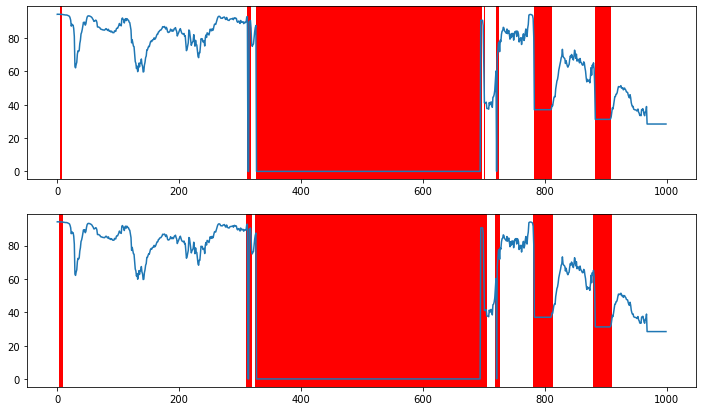

In [15]:
start = 0
stop  = 1000

plt.figure(figsize =  (12,7))
ax1 = plt.subplot(211)
for reg in regions:
    if reg[0] > start and reg[1] < stop:
        ax1.axvspan(reg[0] , reg[1], color = 'red')
ax1.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])
        
ax2 = plt.subplot(212)
for reg in regions_marg:
    if reg[0] > start and reg[1] < stop:
        ax2.axvspan(reg[0], reg[1], color = 'red')
ax2.plot(um[cols_um[0]].index[start:stop],um[cols_um[0]][start:stop])

plt.show()

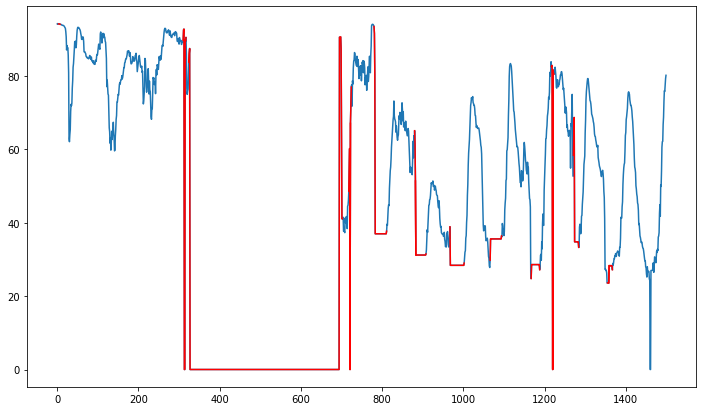

In [16]:
start = 0
stop = 1500

plt.figure(figsize =  (12,7))
plt.plot(um[cols_um[0]][start:stop].index,um[cols_um[0]][start:stop])
for reg in regions_marg:
    if reg[0] > start and reg[1] < stop:
        x = list(range(reg[0],reg[1]))
        y = um[cols_um[0]][reg[0]:reg[1]]
        plt.plot(x, y, color = 'red')
plt.show()